# MAIN FIGURES
THIS NOTEBOOK GENERATES ALL MAIN FIGURES IN CATALÁN ET AL. (2020)

In [1]:
from functions import *

# FIGURE 1

## FIGURE 1A

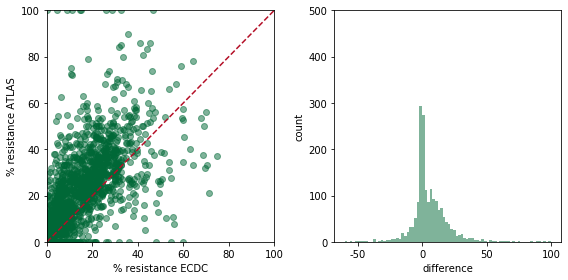

In [2]:
RD=pd.read_excel('data/atlas_vs_ecdc.xls')
x=RD['ECDCValue']
y=RD['ATLASValue']


color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(8,4))
#SCATTERPLOT
ax=fig.add_subplot(1,2,1)
ax.plot(x,y,'o', color=color1, alpha=0.5)
xodr=np.linspace(0,100,100)
ax.plot(xodr,xodr,'--', color=color2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% resistance ECDC')
ax.set_ylabel('% resistance ATLAS')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))    
#HISTOGRAM
ax=fig.add_subplot(1,2,2)
D=RD['Diff']
bins=np.linspace(-100,100,101)
n, bins=np.histogram(D, bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('difference')
ax.set_ylabel('count')         
ax.set_ylim([0,500])
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d')) 
fig.tight_layout()

## FIGURE 1B

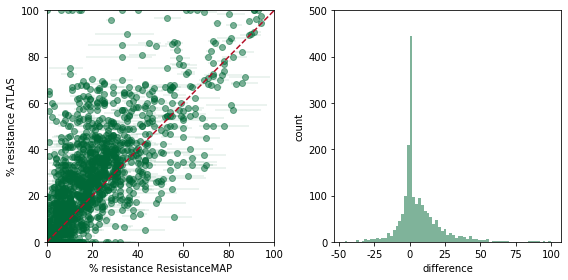

In [3]:
RD=pd.read_excel('data/atlas_vs_resistancemap.xls')
x=RD['RMapValue']
xH=RD['RMapCIHigh']-x
xL=x-RD['RMapCILow']
y=RD['ATLASValue']


color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(8,4))
#SCATTERPLOT
ax=fig.add_subplot(1,2,1)
ax.plot(x,y,'o', color=color1, alpha=0.5)
ax.errorbar(x,y,fmt='o', color=color1, markersize=0, xerr=[xH,xL], alpha=0.1)
xodr=np.linspace(0,100,100)
ax.plot(xodr,xodr,'--', color=color2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% resistance ResistanceMAP')
ax.set_ylabel('% resistance ATLAS')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))    
#HISTOGRAM
ax=fig.add_subplot(1,2,2)
D=RD['Diff']
bins=np.linspace(-100,100,101)
n, bins=np.histogram(D, bins=bins)
n1=[]
b1=[]
w=(bins[1]-bins[0])/2
for x,y in zip(bins,n):
    if y>0:
        n1.append(y)
        b1.append(x+w)
ax.bar(b1,n1, width=2*w, facecolor=color1, alpha=0.5)
ax.set_xlabel('difference')
ax.set_ylabel('count')         
ax.set_ylim([0,500])
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d')) 
fig.tight_layout()

## FIGURE 1C

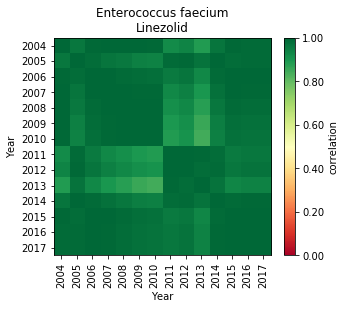

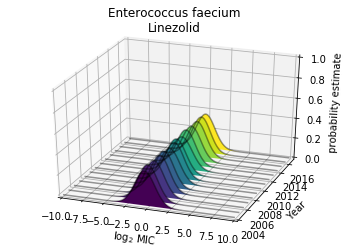

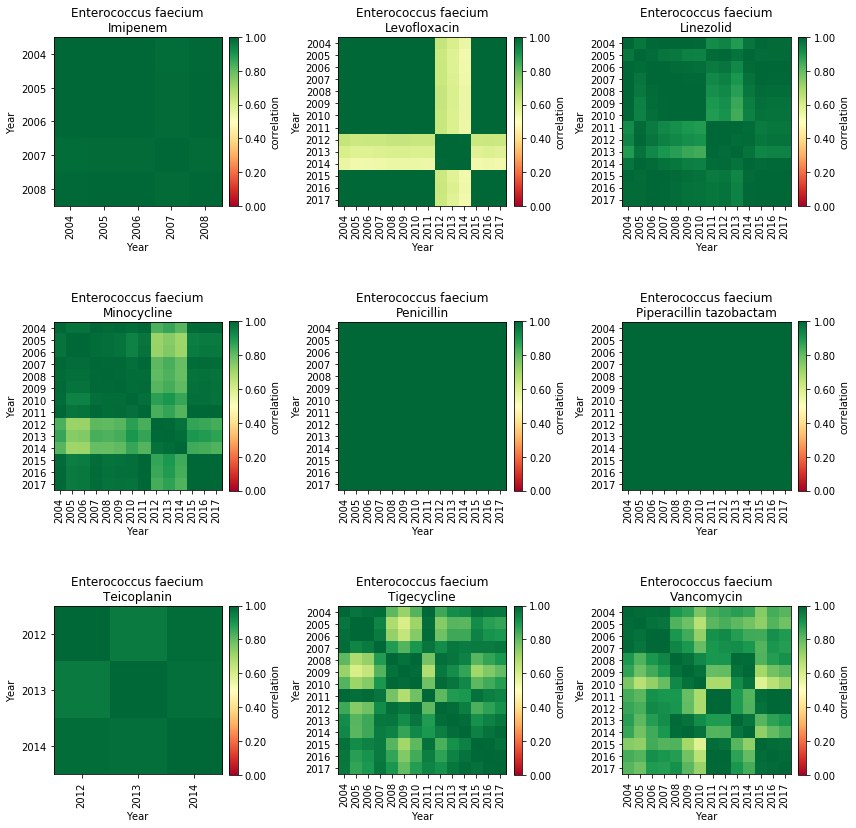

In [4]:
sp='Enterococcus faecium'
dr='Linezolid'
#CORRELELOGRAM
R,Y=read_corr(sp,dr)
fig=plt.figure()
ax=plt.gca()
title=sp+'\n'+dr    
I=plot_corr(R,Y,ax,fig,title)
#WATERFALL PLOT
Z, pY=read_micdist(sp,dr)
fig=plt.figure()
ax=plot_waterfall(Z,pY,fig,title)
#NINE ANTIBIOTICS
fig=plt.figure(figsize=(12,12))
D=['Imipenem','Levofloxacin','Linezolid',
  'Minocycline','Penicillin','Piperacillin tazobactam',
  'Teicoplanin','Tigecycline','Vancomycin']
for i,dr in enumerate(D):
    ax=fig.add_subplot(3,3,i+1)
    R,Y=read_corr(sp,dr)
    title=sp+'\n'+dr
    I=plot_corr(R,Y,ax,fig,title)
fig.tight_layout()

## FIGURE 1D

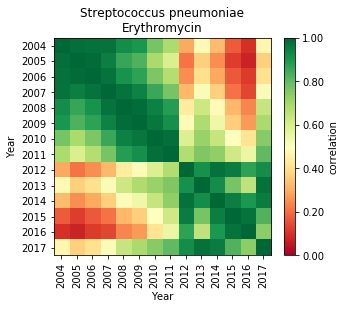

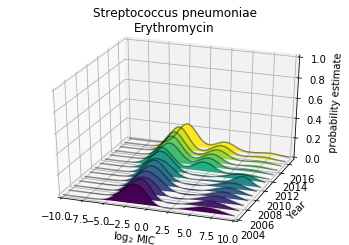

In [5]:
sp='Streptococcus pneumoniae'
dr='Erythromycin'
R,Y=read_corr(sp,dr)
fig=plt.figure()
ax=plt.gca()
title=sp+'\n'+dr
I=plot_corr(R,Y,ax,fig,title)
#WATERFALL PLOT
Z, pY=read_micdist(sp,dr)
fig=plt.figure()
ax=plot_waterfall(Z,pY,fig,title)

# FIGURE 2

## FIGURE 2A

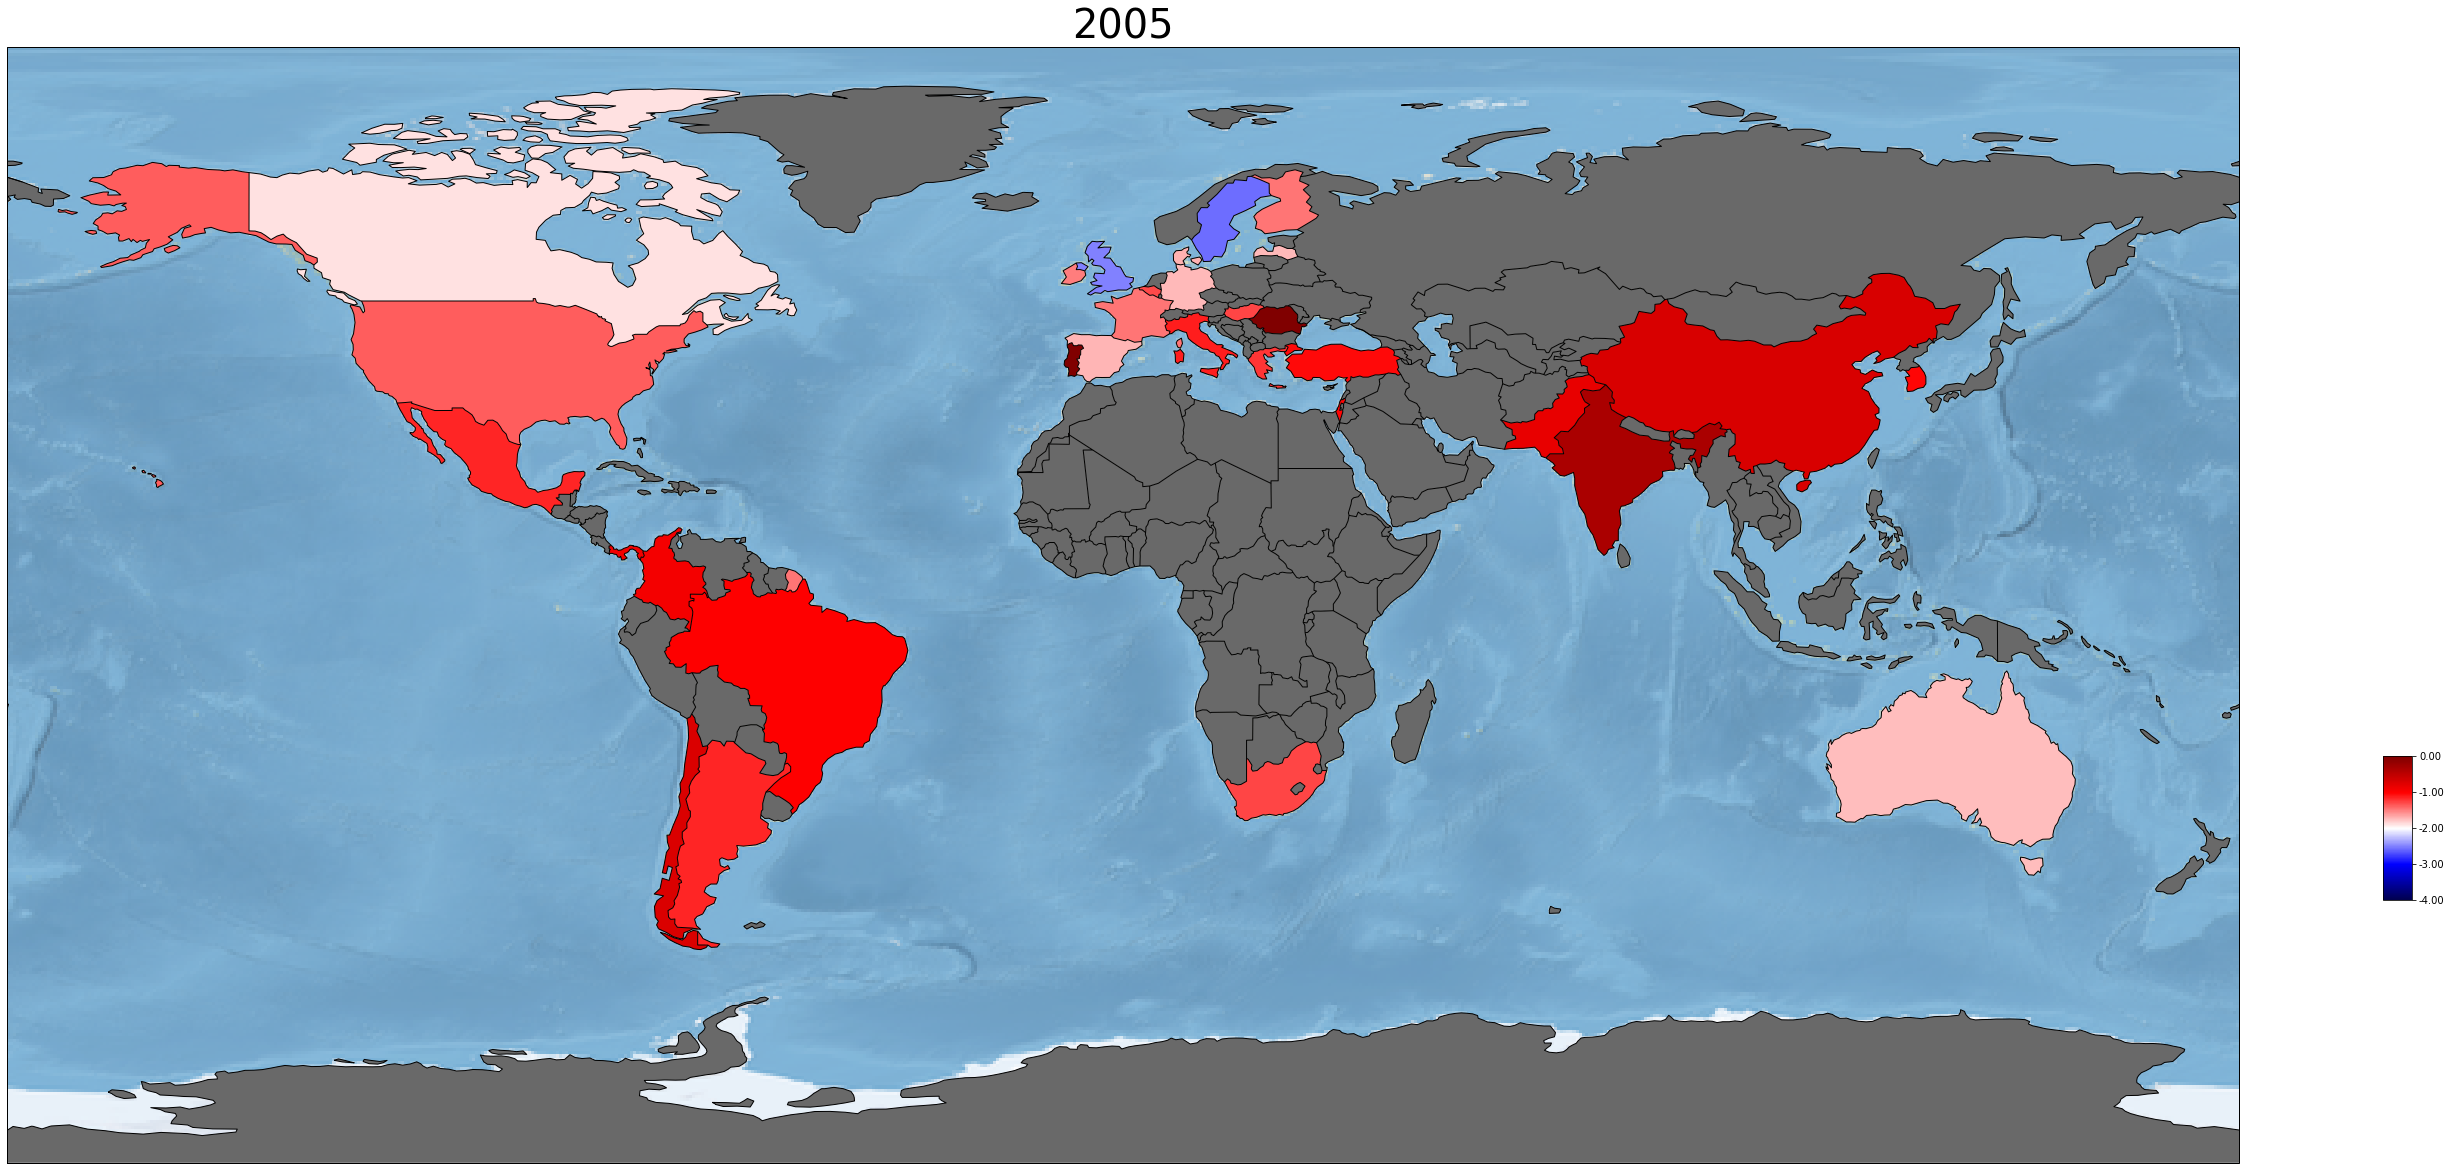

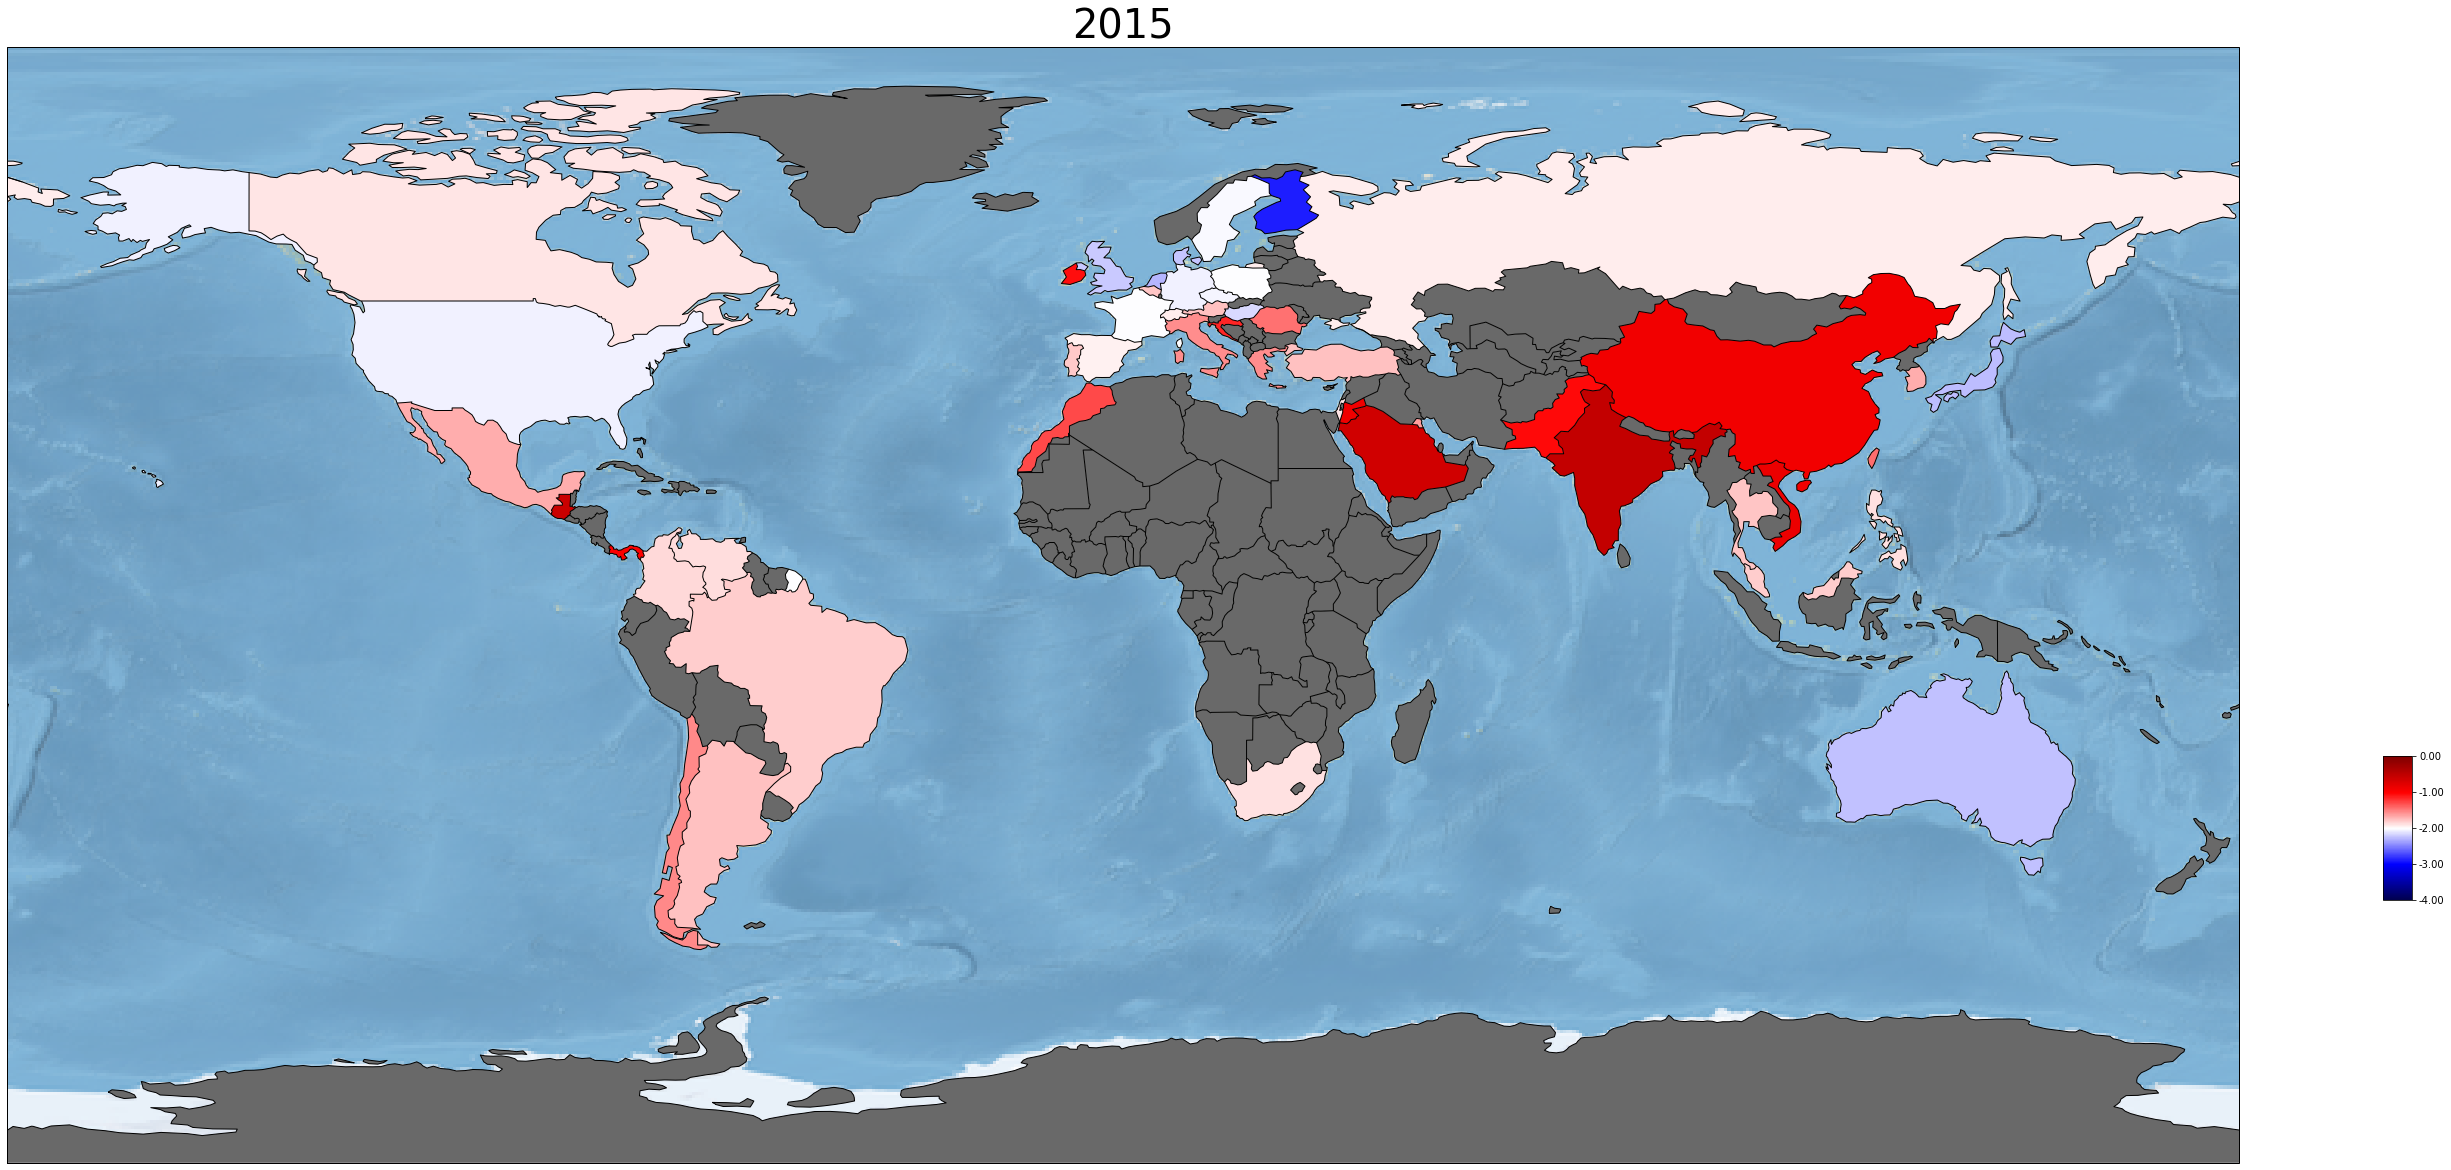

In [6]:
DF=pd.read_csv('data/average_mic_per_year.csv')
pC=get_key(DF,'Country')
Mmin=-4.0
Mmax=0.0
for y in [2005,2015]:
    DFy=DF[DF.Year==y]
    M={}
    for country in pC:
        DFc=DFy[DFy.Country==country]
        m=DFc['Average MIC'].dropna()
        if m.empty: continue
        M[country]=m.mean()
    fig,ax=worldmaps(M,y,Mmin,Mmax)

## FIGURE 2B

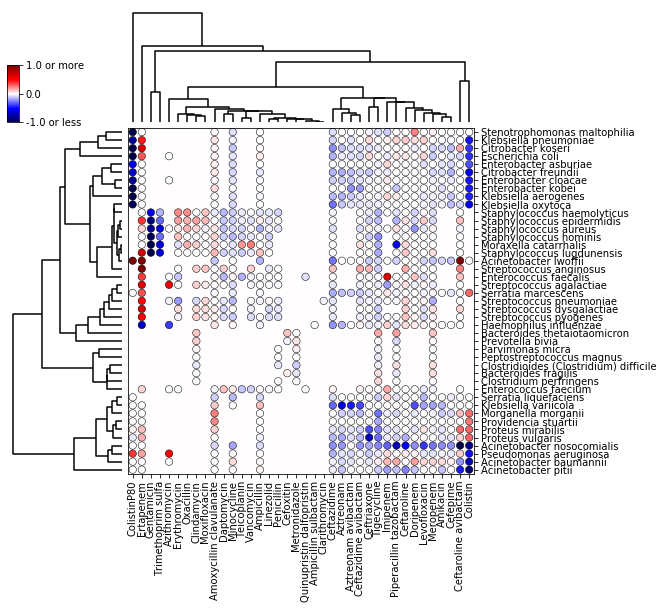

In [7]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
Z,Y1,Y2=clustermap_clustering(X,Y,SC)
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)

## FIGURE 2C

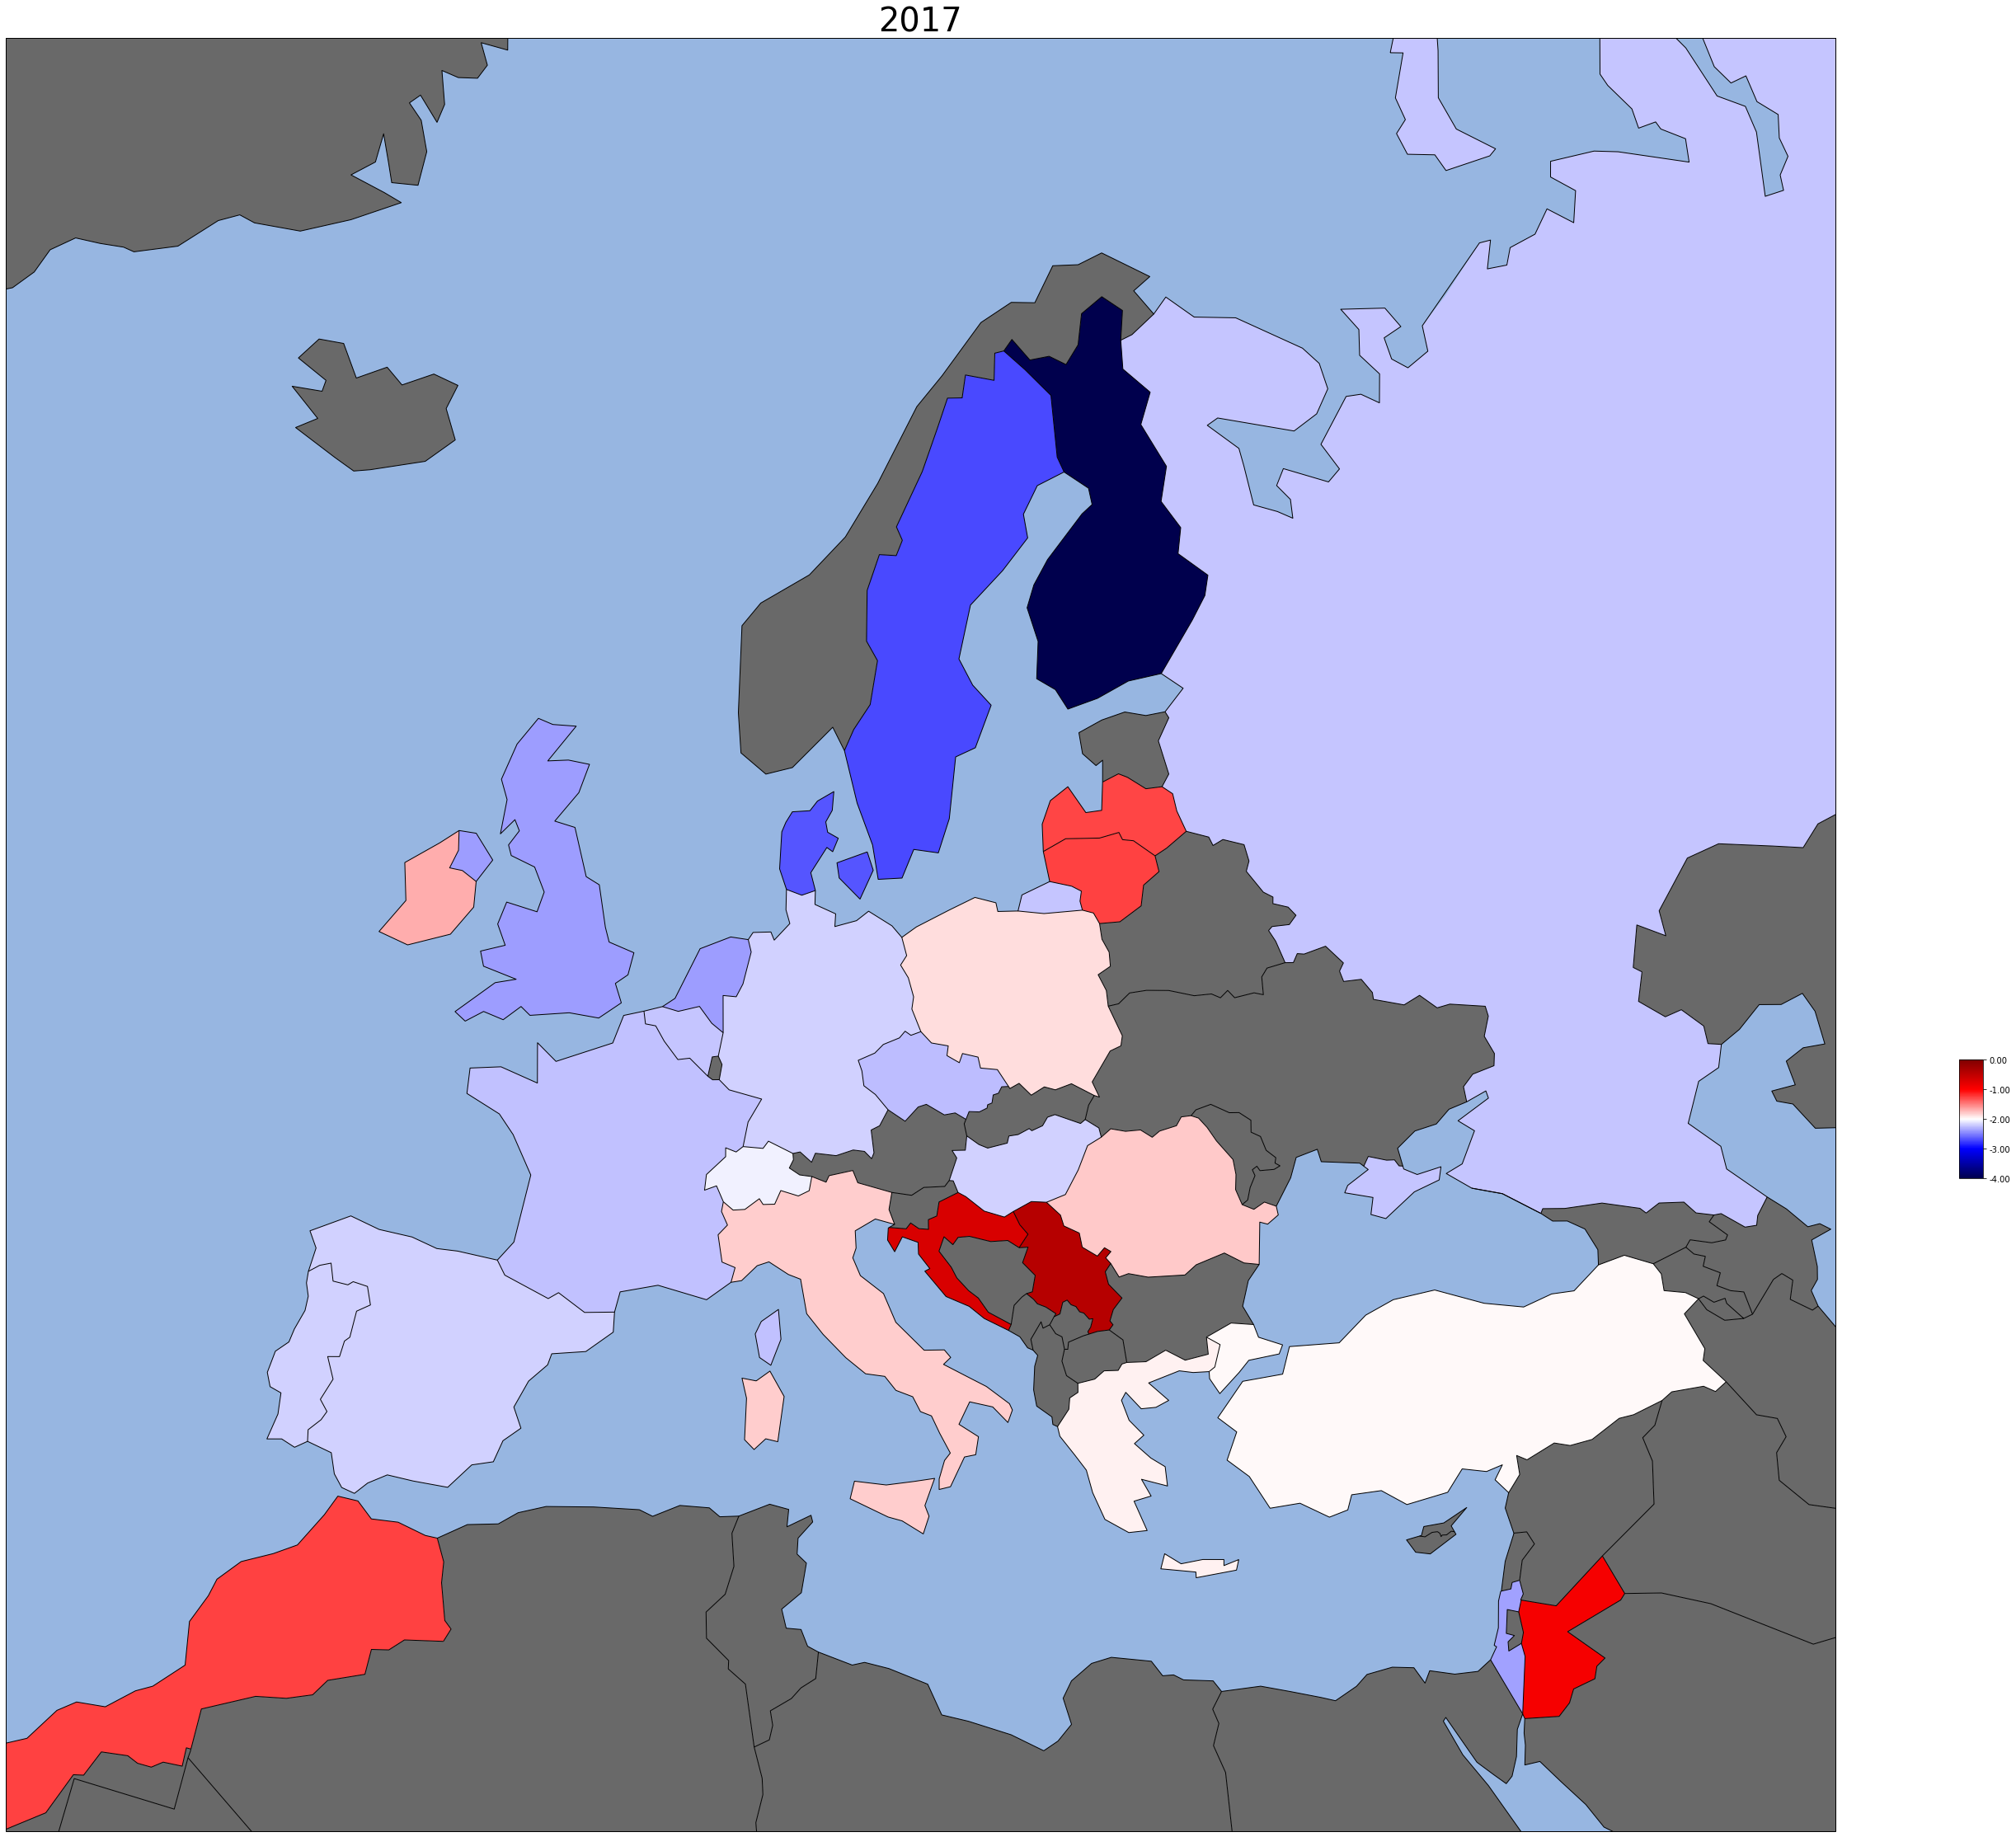

In [8]:
DF=pd.read_csv('data/average_mic_per_year.csv')
pC=get_key(DF,'Country')
Mmin=-4.0
Mmax=0.0
#EUROPEMAP
for y in [2017]:
    DFy=DF[DF.Year==y]
    M={}
    for country in pC:
        DFc=DFy[DFy.Country==country]
        m=DFc['Average MIC'].dropna()
        if m.empty: continue
        M[country]=m.mean()
    fig,ax=worldmaps_europe(M,y,Mmin,Mmax)

# FIGURE 3

## FIGURE 3A

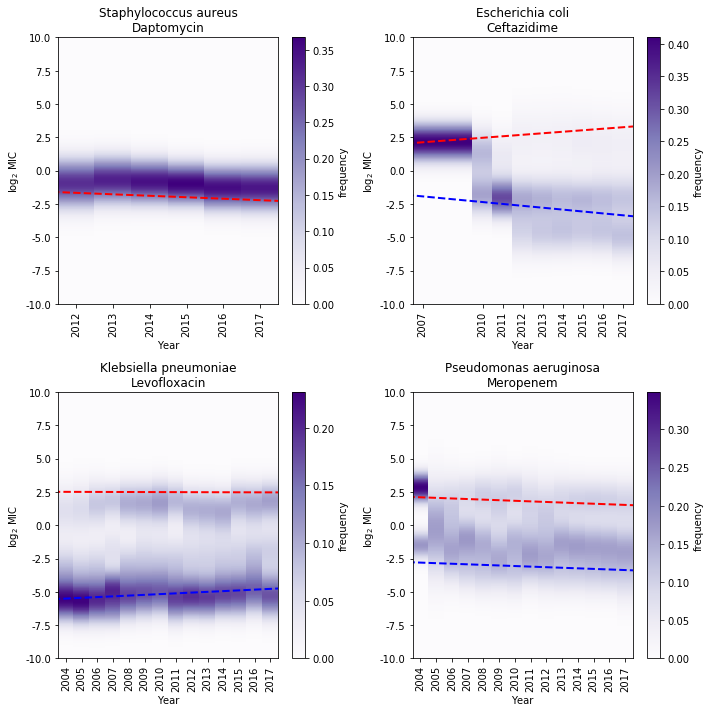

In [9]:
L=[['Staphylococcus aureus', 'Daptomycin'],
    ['Escherichia coli', 'Ceftazidime'],
    ['Klebsiella pneumoniae', 'Levofloxacin'],
    ['Pseudomonas aeruginosa', 'Meropenem']]
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
color1='blue'#blue-ish
color2='red'#reddish
fig=plt.figure(figsize=(10,10))
for i,key in enumerate(L):
    sp=key[0]
    dr=key[1]
    title=sp+'\n'+dr
    Z, pY=read_micdist(sp,dr)
    ax=fig.add_subplot(2,2,i+1)
    H=plot_micdist(Z,pY,fig,ax,title)
    #PLOT TRENDS OVER HEATMAP
    DFc=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    xp=np.linspace(2003,2020,100)
    #global trend
    Gi=DFc.Intercept.mean()
    Gs=DFc.Trend.mean()
    yp=[Gi+z*Gs for z in xp]
    #ax.plot(xp,yp,'k', lw=2)
    #R cluster trend
    Ri=DFc.RIntercept.mean()
    Rs=DFc.Rtrend.mean()
    yp=[Ri+z*Rs for z in xp]
    ax.plot(xp,yp,'--', color=color2,lw=2)
    #S cluster trend
    Si=DFc.SIntercept.mean()
    Ss=DFc.Strend.mean()
    yp=[Si+z*Ss for z in xp]
    ax.plot(xp,yp,'--', color=color1,lw=2)        
    ax.set_xlim([min(pY), max(pY)+1])
fig.tight_layout()

## FIGURE 3B

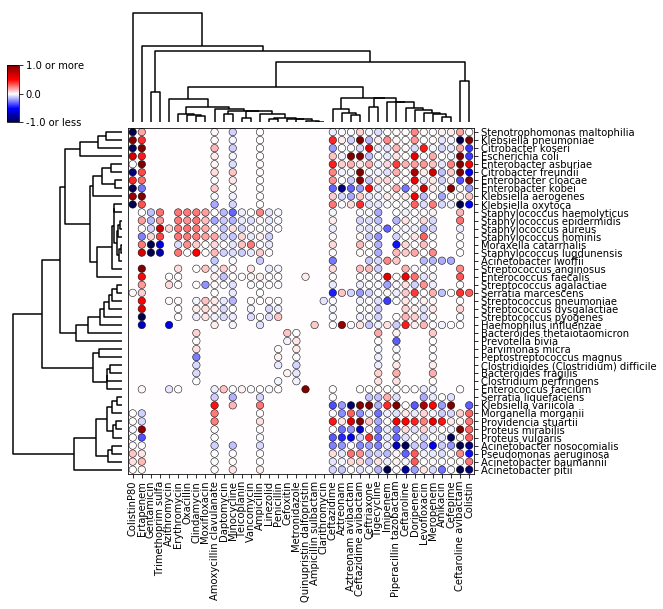

In [10]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
Z,Y1,Y2=clustermap_clustering(X,Y,SC)#we use the data in Fig2B to do the clustering
#NOW READ R CLUSTER TRENDS
DFdata=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['Rtrend']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)

## FIGURE 3C

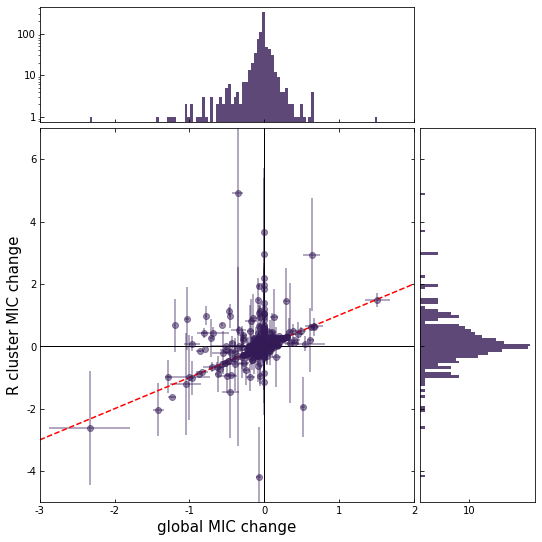

In [11]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
DF=DF.sort_values('Trend')
pL=get_key(DF, 'Species')
drugs=get_key(DF, 'Antibiotic')
DF=DF.dropna(subset=['Trend','Rtrend'])
x=DF['Trend']
xerr=DF['Trenderror']
y=DF['Rtrend']
yerr=DF['Rtrenderror']

#SET AXES FOR HISTOGRAMS
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig=plt.figure(figsize=(8, 8))

color1='#341a56'
color2='red'
ax = plt.axes(rect_scatter)
ax.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

#HISTOGRAMS
nx, bx=np.histogram(x,bins=100)
wx=bx[1]-bx[0]
ax_histx.bar(bx[:-1],nx,align='edge',width=wx,facecolor=color1, alpha=0.8)
ny, by=np.histogram(y,bins=100)
wy=by[1]-by[0]
ax_histy.barh(by[:-1],ny,align='edge',height=wy,facecolor=color1, alpha=0.8)

#SCATTERPLOT
ax.errorbar(x,y,fmt='o',xerr=xerr,yerr=yerr,color=color1,alpha=0.5)

#LABELS AND AXES
minX=-3
maxX=2
xp=np.linspace(minX, maxX,100)
minY=-5
maxY=7
yp=np.linspace(minY, maxY,100)
ax.plot(xp,0*xp,'-k', lw=1)
ax.plot(0*yp,yp,'-k', lw=1)
ax.plot(xp,xp,'--', color=color2)
ax.set_xlabel('global MIC change', size=15)
ax.set_ylabel('R cluster MIC change', Size=15)
ax.set_xticklabels(range(minX,maxX+1), size=10)
ax.set_yticks(range(minY+1,maxY+1,2))
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.set_xlim([minX,maxX])
ax.set_ylim([minY,maxY])
ax_histx.set_xlim([minX,maxX])
ax_histy.set_ylim([minY,maxY])
ax_histx.set_yscale('log')
ax_histy.set_xscale('log')
ax_histx.set_yticklabels(ax_histx.get_yticks())
ax_histx.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax_histy.set_xticklabels(ax_histy.get_xticks())
ax_histy.xaxis.set_major_formatter(FormatStrFormatter('%d'))

## FIGURE 3D

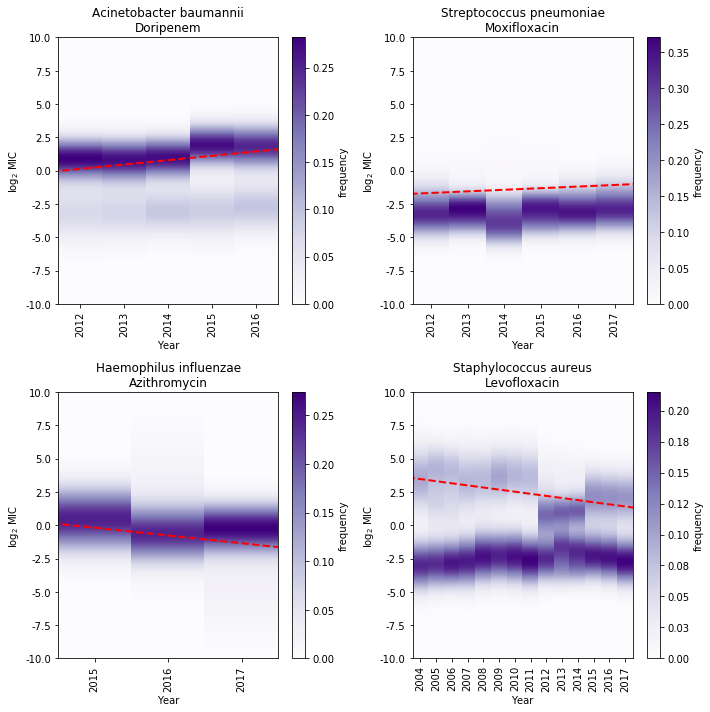

In [12]:
L=[['Acinetobacter baumannii', 'Doripenem'],
    ['Streptococcus pneumoniae', 'Moxifloxacin'],
    ['Haemophilus influenzae', 'Azithromycin'],
    ['Staphylococcus aureus', 'Levofloxacin']]
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
color1='blue'#blue-ish
color2='red'#reddish
fig=plt.figure(figsize=(10,10))
for i,key in enumerate(L):
    sp=key[0]
    dr=key[1]
    title=sp+'\n'+dr
    Z, pY=read_micdist(sp,dr)
    ax=fig.add_subplot(2,2,i+1)
    H=plot_micdist(Z,pY,fig,ax,title)
    #PLOT TRENDS OVER HEATMAP
    DFc=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    xp=np.linspace(2003,2020,100)
    #global trend
    Gi=DFc.Intercept.mean()
    Gs=DFc.Trend.mean()
    yp=[Gi+z*Gs for z in xp]
    #ax.plot(xp,yp,'k', lw=2)
    #R cluster trend
    Ri=DFc.RIntercept.mean()
    Rs=DFc.Rtrend.mean()
    yp=[Ri+z*Rs for z in xp]
    ax.plot(xp,yp,'--', color=color2,lw=2)
    #S cluster trend
    Si=DFc.SIntercept.mean()
    Ss=DFc.Strend.mean()
    yp=[Si+z*Ss for z in xp]
    #ax.plot(xp,yp,'--', color=color1,lw=2)        
    ax.set_xlim([min(pY), max(pY)+1])
fig.tight_layout()

# FIGURE 4

## FIGURE 4A

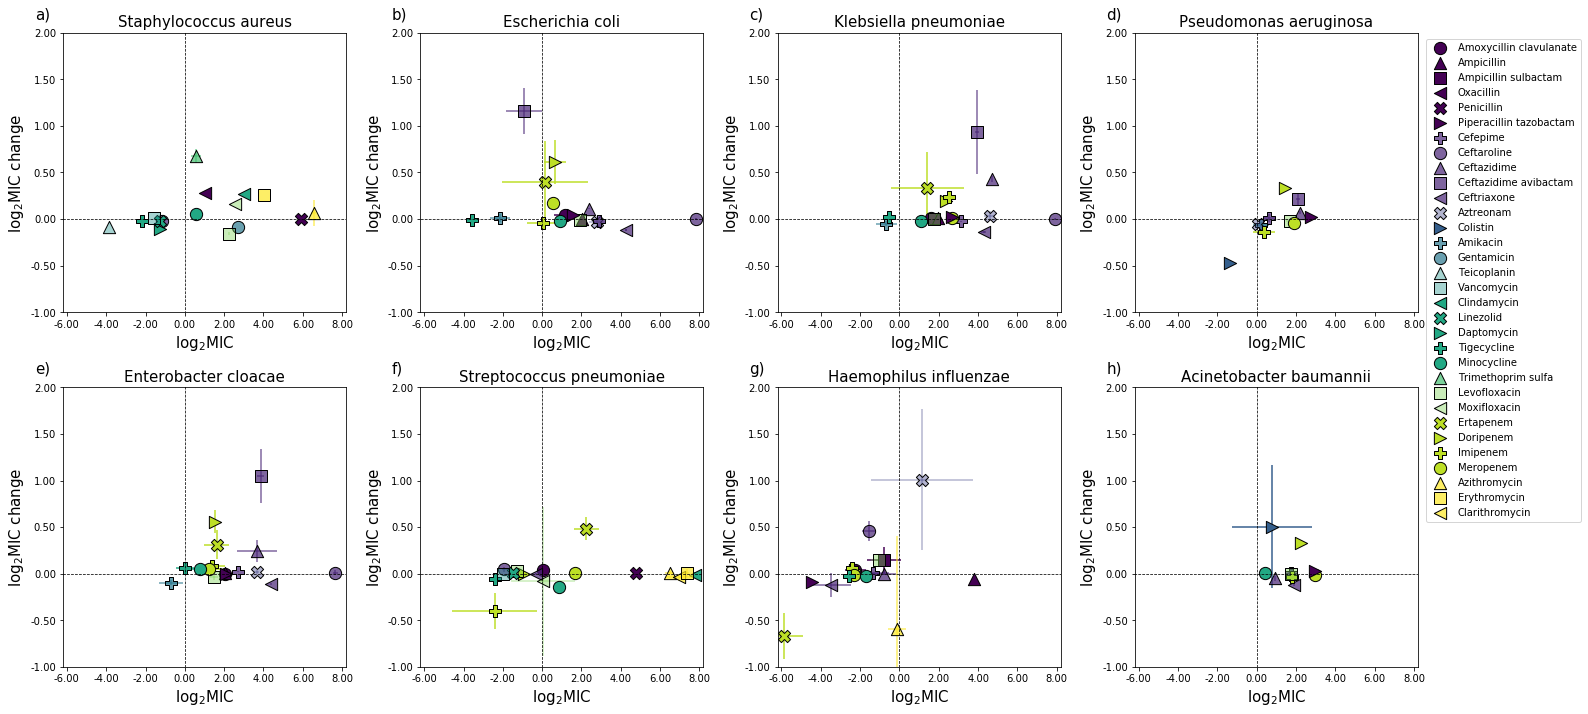

In [13]:
#GROUP ANTIBIOTICS IN CLASSES
PEN=['Amoxycillin clavulanate', 'Ampicillin', 'Ampicillin sulbactam',
     'Oxacillin', 'Penicillin', 'Piperacillin tazobactam']
CEP=['Cefepime', 'Ceftaroline',
     'Ceftazidime',
     'Ceftazidime avibactam', 'Ceftriaxone']
MON=['Aztreonam']
MAC=['Azithromycin', 'Erythromycin', 'Clarithromycin']
AMI=['Amikacin', 'Gentamicin']
GLY=['Teicoplanin', 'Vancomycin']
TET=['Clindamycin', 'Linezolid', 'Daptomycin',
     'Tigecycline', 'Minocycline']
SUL=['Trimethoprim sulfa']
QUI=['Levofloxacin', 'Moxifloxacin']
CAR=['Ertapenem', 'Doripenem', 'Imipenem', 'Meropenem']
COL=['Colistin']

dClass=[PEN, CEP, MON, COL, AMI,
        GLY, TET, SUL, QUI, CAR, MAC]
newdrugs=[z for y in dClass for z in y]
DFM=pd.read_csv('results/Rcluster/resistant_cluster_trends.csv')
pL=get_key(DFM, 'Species')
SPL=['Staphylococcus aureus', 'Escherichia coli',
     'Klebsiella pneumoniae', 'Pseudomonas aeruginosa', 
     'Enterobacter cloacae', 'Streptococcus pneumoniae', 
     'Haemophilus influenzae', 'Acinetobacter baumannii']
DFM=DFM[DFM.Species.isin(SPL)]
drugs=get_key(DFM, 'Antibiotic')
drugs=sorted(drugs)

vals=np.linspace(0,1,len(dClass))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH ANTIBIOTIC
LS=['o', '^', 's', '<', 'X', '>', 'P']
TL=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
TA=[1.0, 0.7, 0.4]
LM={}
LC={}
LA={}
for count, dr in enumerate(newdrugs):
    LM[dr]=LS[count%len(LS)]
for i1, D in enumerate(dClass):
    for count, dr in enumerate(D):
        LC[dr]=cmap(i1/len(dClass))
        LA[dr]=TA[i1%len(TA)]
#COLORS WITH TRANSPARENCY
LC2={}
for key,value in LC.items():
    mV=max(value[0:3])
    LC2[key]=tuple([z for z in value[0:3]]+[LA[key]])
fig=plt.figure(figsize=(20,10))
handles=[]
labels=[]
#PLOT
for i,sp in enumerate(SPL):
    DFsp=DFM[DFM.Species==sp]
    ax=fig.add_subplot(2,4,i+1)
    minx=1e6
    maxx=-1e6
    miny=1e6
    maxy=-1e6
    for dr in drugs:
        DF=DFsp[DFsp.Antibiotic==dr]
        if DF.empty: continue                
        #PHASE PLANE FOR R
        x=DF['Rvalue'].mean()
        xerr=DF['Rerror'].mean()
        y=DF['Rtrend'].mean()
        yerr=DF['Rtrenderror'].mean() 
        minx=min(minx,x)
        miny=min(miny,y)
        maxx=max(maxx,x)
        maxy=max(maxy,y)
        ax.scatter(x,y,edgecolors='black',color=LC2[dr],marker=LM[dr], 
                   s=150, zorder=2, label=dr)
        ax.errorbar(x,y,fmt='o',color=LC[dr],markersize=0, 
                    xerr=xerr,yerr=yerr, zorder=1, alpha=LA[dr])
    #LABELS
    ax.set_xlabel('log$_2$MIC', fontsize=15)
    ax.set_ylabel('log$_2$MIC change', fontsize=15)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    yp=np.linspace(-40,40,100)
    xp=[0 for z in yp]
    ax.plot(xp,yp,'--k', linewidth=0.75)
    ax.plot(yp,xp, '--k', linewidth=0.75)
    ax.set_xlim([minx-0.1,0.1+maxx])
    ax.set_ylim([miny-0.1,0.1+maxy])
    ax.set_ylim([-1,2])
    ax.set_xlim([-6.2,8.2])
    handles1, labels1 = ax.get_legend_handles_labels()
    handles+=handles1
    labels+=labels1
    ax.set_title(sp, fontsize=15)
    ax.text(-0.1, 1.05, TL[i], fontsize=15, transform=ax.transAxes)
#ORGANIZE LABELS
H=[0 for z in newdrugs]
L=[z for z in newdrugs]
for h,l in zip(handles,labels):
    index1=L.index(l)
    H[index1]=h
fig.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.5, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=1)
fig.tight_layout()

## FIGURE 4B

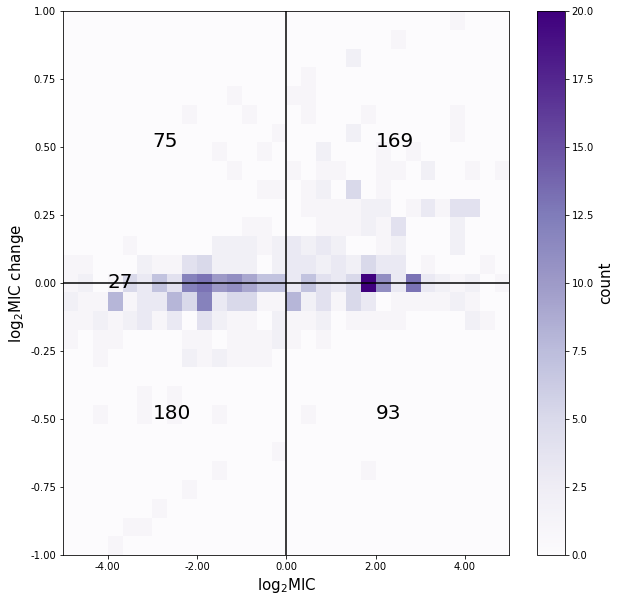

In [14]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends.csv')
pL=get_key(DF, 'Species')
DF=DF[DF.Species.isin(pL)]
drugs=get_key(DF, 'Antibiotic')
drugs=sorted(drugs)

x=DF['Rvalue']
y=DF['Rtrend']

#FIRST QUADRANT
DF1=DF[(DF.Rvalue>0) & (DF.Rtrend>0)]
#SECOND QUDRANT
DF2=DF[(DF.Rvalue<0) & (DF.Rtrend>0)]
#THIRD QUADRANT
DF3=DF[(DF.Rvalue<0) & (DF.Rtrend<0)]
#FOURTH QUADRANT
DF4=DF[(DF.Rvalue>0) & (DF.Rtrend<0)]
#HORIZONTAL LINE
DF5=DF[DF.Rtrend==0]
DF6=DF[DF.Rvalue==0]

minx=np.floor(x.min())
miny=np.floor(y.min())
maxx=np.ceil(x.max())
maxy=np.ceil(y.max())
miny=-1
maxy=1
minx=-5
maxx=5
xedges=np.linspace(minx,maxx,31)
yedges=np.linspace(miny,maxy,30)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
I=ax.imshow(H, aspect='auto',interpolation='nearest', origin='low', 
          cmap='Purples', vmin=0, vmax=20,
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar=plt.colorbar(I)#, ax=ax)
cbar.ax.set_yticklabels(cbar.ax.get_yticks())
cbar.ax.set_ylabel('count', fontsize=15)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_xlabel('log$_2$MIC', fontsize=15)
ax.set_ylabel('log$_2$MIC change', fontsize=15)
ax.text(2.00,0.5,str(len(DF1)), size=20)
ax.text(-3.00,0.5,str(len(DF2)), size=20)
ax.text(-3.00,-0.5,str(len(DF3)), size=20)
ax.text(2.00,-0.5,str(len(DF4)), size=20)
ax.text(-4.00,-0.02,str(len(DF5)), size=20)
ax.plot(xedges,[0 for z in xedges],'k')
ax.plot([0 for z in yedges],yedges,'k')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

## FIGURE 4C

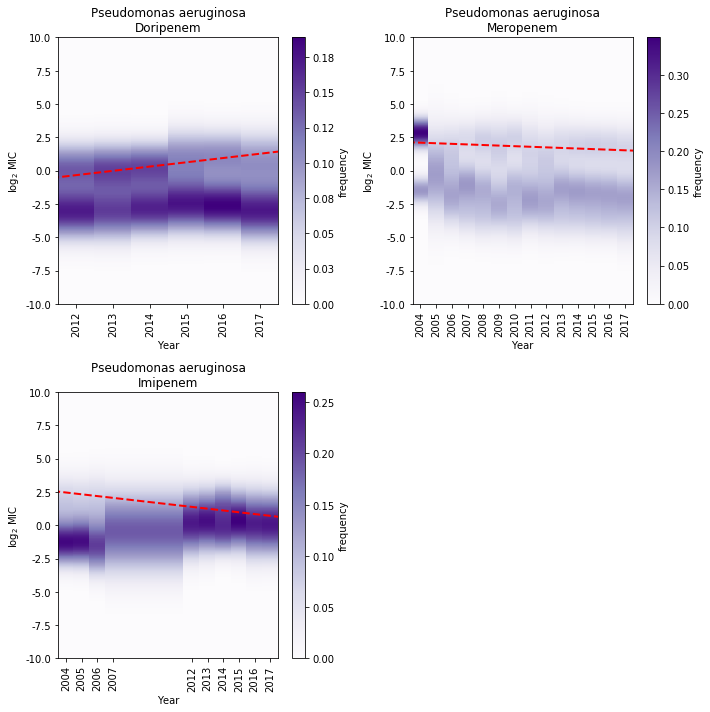

In [15]:
L=[['Pseudomonas aeruginosa', 'Doripenem'],
   ['Pseudomonas aeruginosa', 'Meropenem'],
   ['Pseudomonas aeruginosa', 'Imipenem']]
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
color1='blue'#blue-ish
color2='red'#reddish
fig=plt.figure(figsize=(10,10))
for i,key in enumerate(L):
    sp=key[0]
    dr=key[1]
    title=sp+'\n'+dr
    Z, pY=read_micdist(sp,dr)
    ax=fig.add_subplot(2,2,i+1)
    H=plot_micdist(Z,pY,fig,ax,title)
    #PLOT TRENDS OVER HEATMAP
    DFc=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    xp=np.linspace(2003,2020,100)
    #global trend
    Gi=DFc.Intercept.mean()
    Gs=DFc.Trend.mean()
    yp=[Gi+z*Gs for z in xp]
    #ax.plot(xp,yp,'k', lw=2)
    #R cluster trend
    Ri=DFc.RIntercept.mean()
    Rs=DFc.Rtrend.mean()
    yp=[Ri+z*Rs for z in xp]
    ax.plot(xp,yp,'--', color=color2,lw=2)
    #S cluster trend
    Si=DFc.SIntercept.mean()
    Ss=DFc.Strend.mean()
    yp=[Si+z*Ss for z in xp]
    #ax.plot(xp,yp,'--', color=color1,lw=2)        
    ax.set_xlim([min(pY), max(pY)+1])
fig.tight_layout()